In [7]:
import pandas as pd
import numpy as np

In [24]:
def rel_err(true, pred):
    return ((true.to_numpy() - pred.to_numpy())**2).mean() / (true.to_numpy()**2).mean()

In [22]:
data_path = 'data/bulk_rna.csv'
res_path = 'results/bulk_rna/'

In [28]:
true_df = pd.read_csv(data_path).set_index('gene name')
noisy_bern = pd.read_csv(res_path + 'noisy_bernoulli.csv')
noisy_gauss = pd.read_csv(res_path + 'noisy_gaussian.csv')
noisy_unif = pd.read_csv(res_path + 'noisy_uniform.csv')
denoised_bern = pd.read_csv(res_path + 'denoised_bernoulli.csv')
denoised_bern_la = pd.read_csv(res_path + 'denoised_bernoulli_local_avg.csv')
denoised_gauss = pd.read_csv(res_path + 'denoised_gaussian.csv')
denoised_gauss_la = pd.read_csv(res_path + 'denoised_gaussian_local_avg.csv')
denoised_unif = pd.read_csv(res_path + 'denoised_uniform.csv')
denoised_unif_la = pd.read_csv(res_path + 'denoised_uniform_local_avg.csv')

In [35]:
# Compute relative errors
noisy_bern_err = rel_err(true_df, noisy_bern)
noisy_gauss_err = rel_err(true_df, noisy_gauss)
noisy_unif_err = rel_err(true_df, noisy_unif)
denoised_bern_err = rel_err(true_df, denoised_bern)
denoised_bern_la_err = rel_err(true_df, denoised_bern_la)
denoised_gauss_err = rel_err(true_df, denoised_gauss)
denoised_gauss_la_err = rel_err(true_df, denoised_gauss_la)
denoised_unif_err = rel_err(true_df, denoised_unif)
denoised_unif_la_err = rel_err(true_df, denoised_unif_la)

In [36]:
# Create table
data = {
    'Noise Type': ['Bernoulli', 'Gaussian', 'Uniform'],
    'Noisy': [noisy_bern_err, noisy_gauss_err, noisy_unif_err],
    'Denoised': [denoised_bern_err, denoised_gauss_err, denoised_unif_err],
    'Denoised local avg': [denoised_bern_la_err, denoised_gauss_la_err, denoised_unif_la_err]
}
table = pd.DataFrame(data)
table.set_index('Noise Type', inplace=True)
print(table)

               Noisy     Denoised  Denoised local avg
Noise Type                                           
Bernoulli   0.499801     0.079235            0.398848
Gaussian    0.373186     0.170993            0.064625
Uniform     0.280081  4250.321009            0.291899


In [44]:
((denoised_unif.to_numpy() - true_df.to_numpy())**2).max()

7372526.159981235

In [45]:
denoised_unif.to_numpy().max()

2717.614759998319

In [47]:
true_df.to_numpy().max()

5.96579876

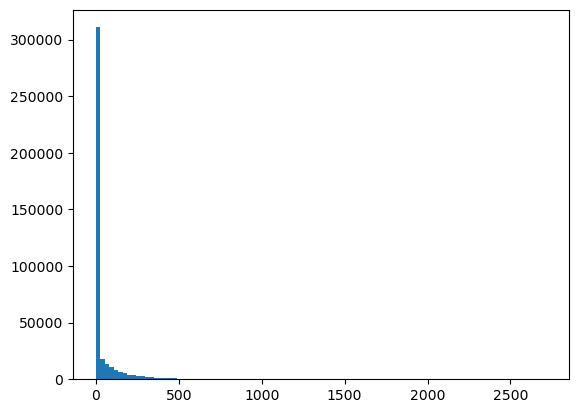

In [50]:
plt.hist(denoised_unif.to_numpy().flatten(), bins=100)
plt.show()

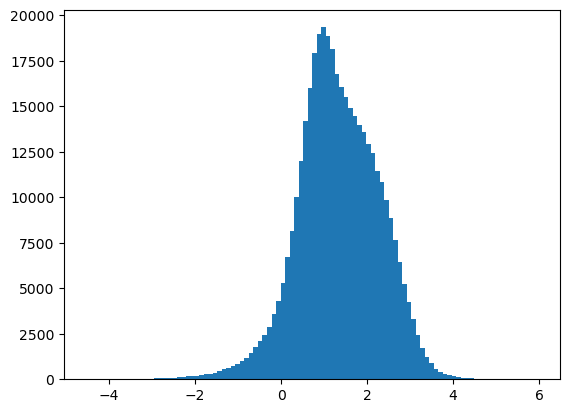

In [51]:
plt.hist(true_df.to_numpy().flatten(), bins=100)
plt.show()

In [39]:
true_df

,GSM588170,GSM588194,GSM588143,GSM588149,GSM588156,GSM588212,GSM588089,GSM588209,GSM588253,GSM588091,...,GSM588245,GSM588270,GSM588276,GSM588199,GSM588254,GSM588120,GSM588144,GSM588243,GSM588214,GSM588126
gene name,,,,,,,,,,,,,,,,,,,,,
Y48G1C.5,0.887329,1.561189,1.188962,1.374727,1.073742,1.299976,1.222438,1.005585,1.211863,1.832583,...,1.192772,-0.068927,0.630709,1.524709,1.904841,1.180024,1.600195,0.004152,1.103106,1.135595
duox-2,0.637265,0.672834,0.423572,0.632248,0.597589,0.474412,0.604319,0.880127,0.822825,0.186962,...,0.339892,0.154112,0.163005,0.216598,0.060992,-0.005072,0.134636,0.194603,0.181892,0.496335
F56C11.6,-0.107257,0.209539,0.197552,0.543018,0.530271,1.744724,0.299308,1.288085,2.083100,1.138062,...,-0.338613,-0.785437,-0.432924,-0.797487,-0.415655,-0.887616,-0.853415,-0.643987,-0.593493,-1.020113
Y65B4BL.6,-1.056653,-0.721364,-0.842977,-0.400883,0.788930,2.917417,-0.907214,1.351989,2.675514,2.902400,...,-1.283907,-2.119277,-1.666394,-1.995304,-2.056132,-1.897763,-1.377806,-2.702277,-2.021386,-2.203076
Y18H1A.11,0.909201,1.111235,1.226373,1.042114,0.856967,1.074839,1.146109,1.381871,1.013518,1.447697,...,1.341530,1.263322,0.934018,1.046733,1.485550,0.890541,1.010425,0.826860,0.793952,0.572188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F52G3.5,-0.678635,0.028741,-0.369158,0.204940,1.020066,1.312755,-0.085106,1.743289,2.361731,1.430658,...,-1.131653,-0.888700,-0.645159,-1.209507,-1.031910,-0.589061,-0.287131,-1.131924,-0.916362,-0.774403
F35B3.4,-0.026297,-0.174165,-0.244334,0.566890,0.638354,-1.323988,-0.269728,-1.410465,0.109167,0.477209,...,0.243628,-0.689356,-0.884693,-0.810880,-1.011494,-0.809832,-1.317065,-1.153449,-0.503665,-0.881776
T25G12.6,0.994120,1.471049,1.338287,1.192916,0.871136,0.223184,0.943942,1.621053,1.218519,1.479722,...,0.914809,1.184834,1.011293,1.042504,0.885942,0.917613,0.699694,0.552725,0.892163,0.665904
